In [27]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')
from helpers import *
from implementations import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y_train, X_train, ids = load_csv_data(DATA_TRAIN_PATH)

In [4]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, X_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [5]:
X_train_zero, y_train_zero, X_train_one, y_train_one, X_train_many, y_train_many = split_by_jet_num(DATA_TRAIN_PATH, X_train, y_train)
X_test_zero, ids_test_zero, X_test_one, ids_test_one, X_test_many, ids_test_many = split_by_jet_num(DATA_TRAIN_PATH, X_test, ids_test)

In [28]:
def train_predict(X_train, y_train, X_test, max_iters=3000, degree=2, lambda_=0.01, gamma=0.01, imputable_th=0, encodable_th=1, verbose=True):
    tX_train, ty_train, tX_test, _, cont_features = preprocess(X_train, y_train, X_test, imputable_th=imputable_th, encodable_th=encodable_th, switch_encoding=True)
    tX_train_poly = np.c_[build_poly(tX_train, degree=degree, cont_features=cont_features), cross_polynomial_feature_expansion(tX_train)]
    tX_train_poly_log = np.c_[tX_train_poly,simple_logarithmic_feature_expansion(tX_train,1)]


    weights, loss = reg_logistic_regression(ty_train, tX_train_poly_log, max_iters=max_iters, lambda_=lambda_, gamma=gamma, verbose=verbose)
    tX_test_poly = np.c_[build_poly(tX_test, degree=degree, cont_features=cont_features), cross_polynomial_feature_expansion(tX_test)]
    tX_test_poly_log = np.c_[tX_test_poly,simple_logarithmic_feature_expansion(tX_test,1)]

    y_pred = predict_logistic(weights, tX_test_poly_log)
    y_pred = replace_values(y_pred, from_val=0, to_val=-1)
    return y_pred, weights, loss

In [35]:
degree = 2
lambda_ = 0.001
gamma = 0.01
max_iters = 3000

In [36]:
y_pred_zero, weights_zero, loss_zero = train_predict(X_train_zero, y_train_zero, X_test_zero, max_iters=5000, degree=degree, lambda_=0.001, imputable_th=0.5)

Cross Polynomial expansion of degree 1 done : adding (99913, 120)
Logarithmic expansion of degree 1 done : adding (99913, 16)
Iteration = 0, accuracy = 25.514197351695977, loss = 14.264683276222623
Iteration = 10, accuracy = 25.514197351695977, loss = 12.849620464324376
Iteration = 20, accuracy = 25.50919299790818, loss = 10.618486518760792
Iteration = 30, accuracy = 25.571246984876844, loss = 7.848748416914822
Iteration = 40, accuracy = 31.47037922993004, loss = 5.234045821497157
Iteration = 50, accuracy = 44.98313532773513, loss = 3.7699639024183824
Iteration = 60, accuracy = 53.06116321199443, loss = 3.1485614988948445
Iteration = 70, accuracy = 57.11769239238137, loss = 2.8481880527237387
Iteration = 80, accuracy = 59.466736060372526, loss = 2.6704629464714187
Iteration = 90, accuracy = 61.1842302803439, loss = 2.547000620573437
Iteration = 100, accuracy = 62.387276930929914, loss = 2.450543581435801
Iteration = 110, accuracy = 63.31408325242961, loss = 2.3693533546759418
Iteration

In [37]:
y_pred_one, weights_one, loss_one = train_predict(X_train_one, y_train_one, X_test_one, max_iters=5000, degree=degree, lambda_=0.1, imputable_th=0.5)

Cross Polynomial expansion of degree 1 done : adding (77544, 253)
Logarithmic expansion of degree 1 done : adding (77544, 23)
Iteration = 0, accuracy = 35.73455070669556, loss = 12.787676070269784
Iteration = 10, accuracy = 35.73455070669556, loss = 12.400580498308672
Iteration = 20, accuracy = 35.73455070669556, loss = 11.407840699254594
Iteration = 30, accuracy = 35.801609408851746, loss = 9.78340327238678
Iteration = 40, accuracy = 37.16728567007119, loss = 7.735851458728391
Iteration = 50, accuracy = 41.41261735272877, loss = 5.8981451856726395
Iteration = 60, accuracy = 46.3826988548437, loss = 4.785964778533652
Iteration = 70, accuracy = 50.28113071288559, loss = 4.240606504663877
Iteration = 80, accuracy = 52.51341174043124, loss = 3.959615164658513
Iteration = 90, accuracy = 54.03512844320644, loss = 3.788879006955929
Iteration = 100, accuracy = 55.08098627875787, loss = 3.6682103099275087
Iteration = 110, accuracy = 55.82250077375426, loss = 3.5714285187754555
Iteration = 120,

In [41]:
y_pred_many, weights_many, loss_many = train_predict(X_train_many, y_train_many, X_test_many, max_iters=5000, degree=degree, lambda_=0.1, imputable_th=0.5)

Cross Polynomial expansion : 20.0%


KeyboardInterrupt: 

In [39]:
y_pred = np.vstack([y_pred_zero, y_pred_one, y_pred_many])
ids_test = np.hstack([ids_test_zero, ids_test_one, ids_test_many])

In [40]:
from datetime import datetime
method = 'reg_logistic_regression_by_jet'
time = datetime.now().strftime('%Y%m%dH%H%M%S')
OUTPUT_PATH = f'../submissions/submission_{method}_{time}'
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

In [380]:
param_grid = {
    'lambda_': np.logspace(-4, 0, 5),
    'degree': list(range(1, 4)),
    'max_iters': 100,
    'gamma': [0.01, 0.05, 0.1],
    'cont_features': [cont_features]
}
metrics, params = logistic_regression_cv(ty_train, tX_train, param_grid=param_grid)

In [381]:
metrics

{'loss': 0.5020066928657675,
 'accuracy': 75.65127676038173,
 'f1_score': 0.6365493135737614}

In [382]:
params

{'lambda_': 0.01,
 'degree': 2,
 'gamma': 0.1,
 'max_iters': 100,
 'cont_features': (1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21)}

In [409]:
tX_train, ty_train, tX_test, _, cont_features = preprocess(X_train_many, y_train_many, X_test_many, imputable_th=0, encodable_th=1, switch_encoding=True)
tX_train_poly = build_poly(tX_train, degree=degree, cont_features=cont_features)
ty_train_pred = predict_logistic(weights_many, tX_train_poly)
train_accuracy = compute_accuracy(ty_train, ty_train_pred)
train_f1 = compute_f1(ty_train, ty_train_pred)
train_accuracy, train_f1

(77.89035468618613, 0.7485537805508959)

In [403]:
features = read_feature_names(DATA_TRAIN_PATH)
one_jet_features = [f for f in features if f not in ['PRI_jet_num', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet',
                                                     'DER_lep_eta_centrality', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi']]

In [410]:
features = read_feature_names(DATA_TRAIN_PATH)
many_jet_features = [f for f in features if f not in ['PRI_jet_num']]

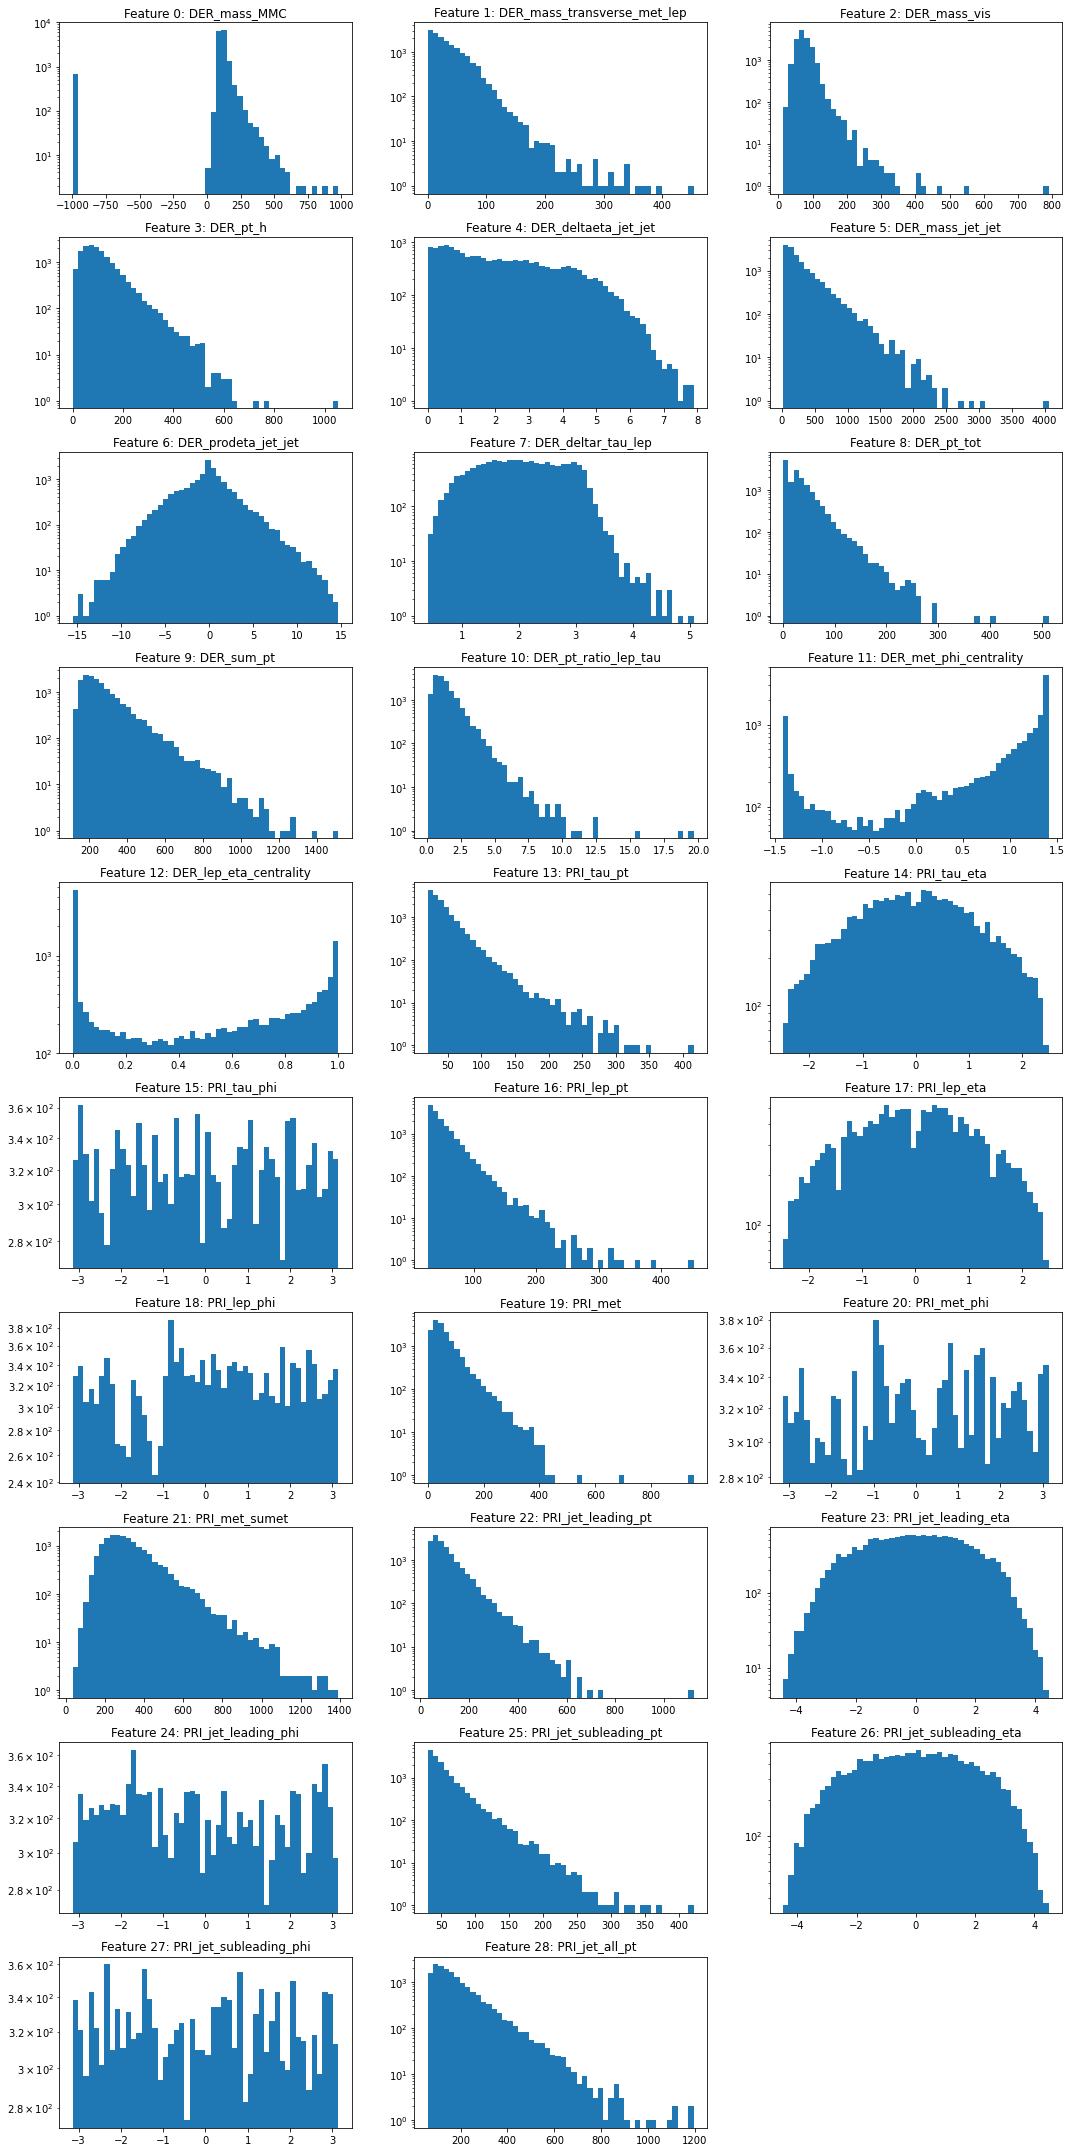

In [412]:
def plot_features_distrib(tX):
    plt.figure(figsize=(15,30))
    for i in range(tX.shape[1]):
        plt.subplot(10,3,i+1)
        plt.hist(tX[:,i], bins=50)
        plt.yscale('log')
        plt.title("Feature {}: {}".format(i, many_jet_features[i]))
    plt.tight_layout()
    plt.show();
plot_features_distrib(X_train_many[(ty_train_pred != ty_train).reshape((-1,))])

In [127]:
tX_val_poly = build_poly(tX_test, degree=params['degree'], cont_features=cont_features)
ty_val_pred = predict_logistic(weights, tX_val_poly)
val_accuracy = compute_accuracy(ty_test, ty_val_pred)
val_f1 = compute_f1(ty_test, ty_val_pred)
val_accuracy, val_f1

(78.412, 0.6540162830950702)

In [129]:
val_tmp = np.hstack([X_train_val, ty_val_pred, ty_test])

In [142]:
val_tmp_mis = val_tmp[val_tmp[:, -1] != val_tmp[:, -2]]

In [143]:
tval_tmp = replace_values(val_tmp_mis, -999, np.nan)
col_nan_ratio = compute_nan_ratio(tval_tmp)

In [144]:
col_nan_ratio

array([0.05984806, 0.        , 0.        , 0.        , 0.67129887,
       0.67129887, 0.67129887, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.67129887, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.32666296, 0.32666296,
       0.32666296, 0.67129887, 0.67129887, 0.67129887, 0.        ,
       0.        , 0.        ])

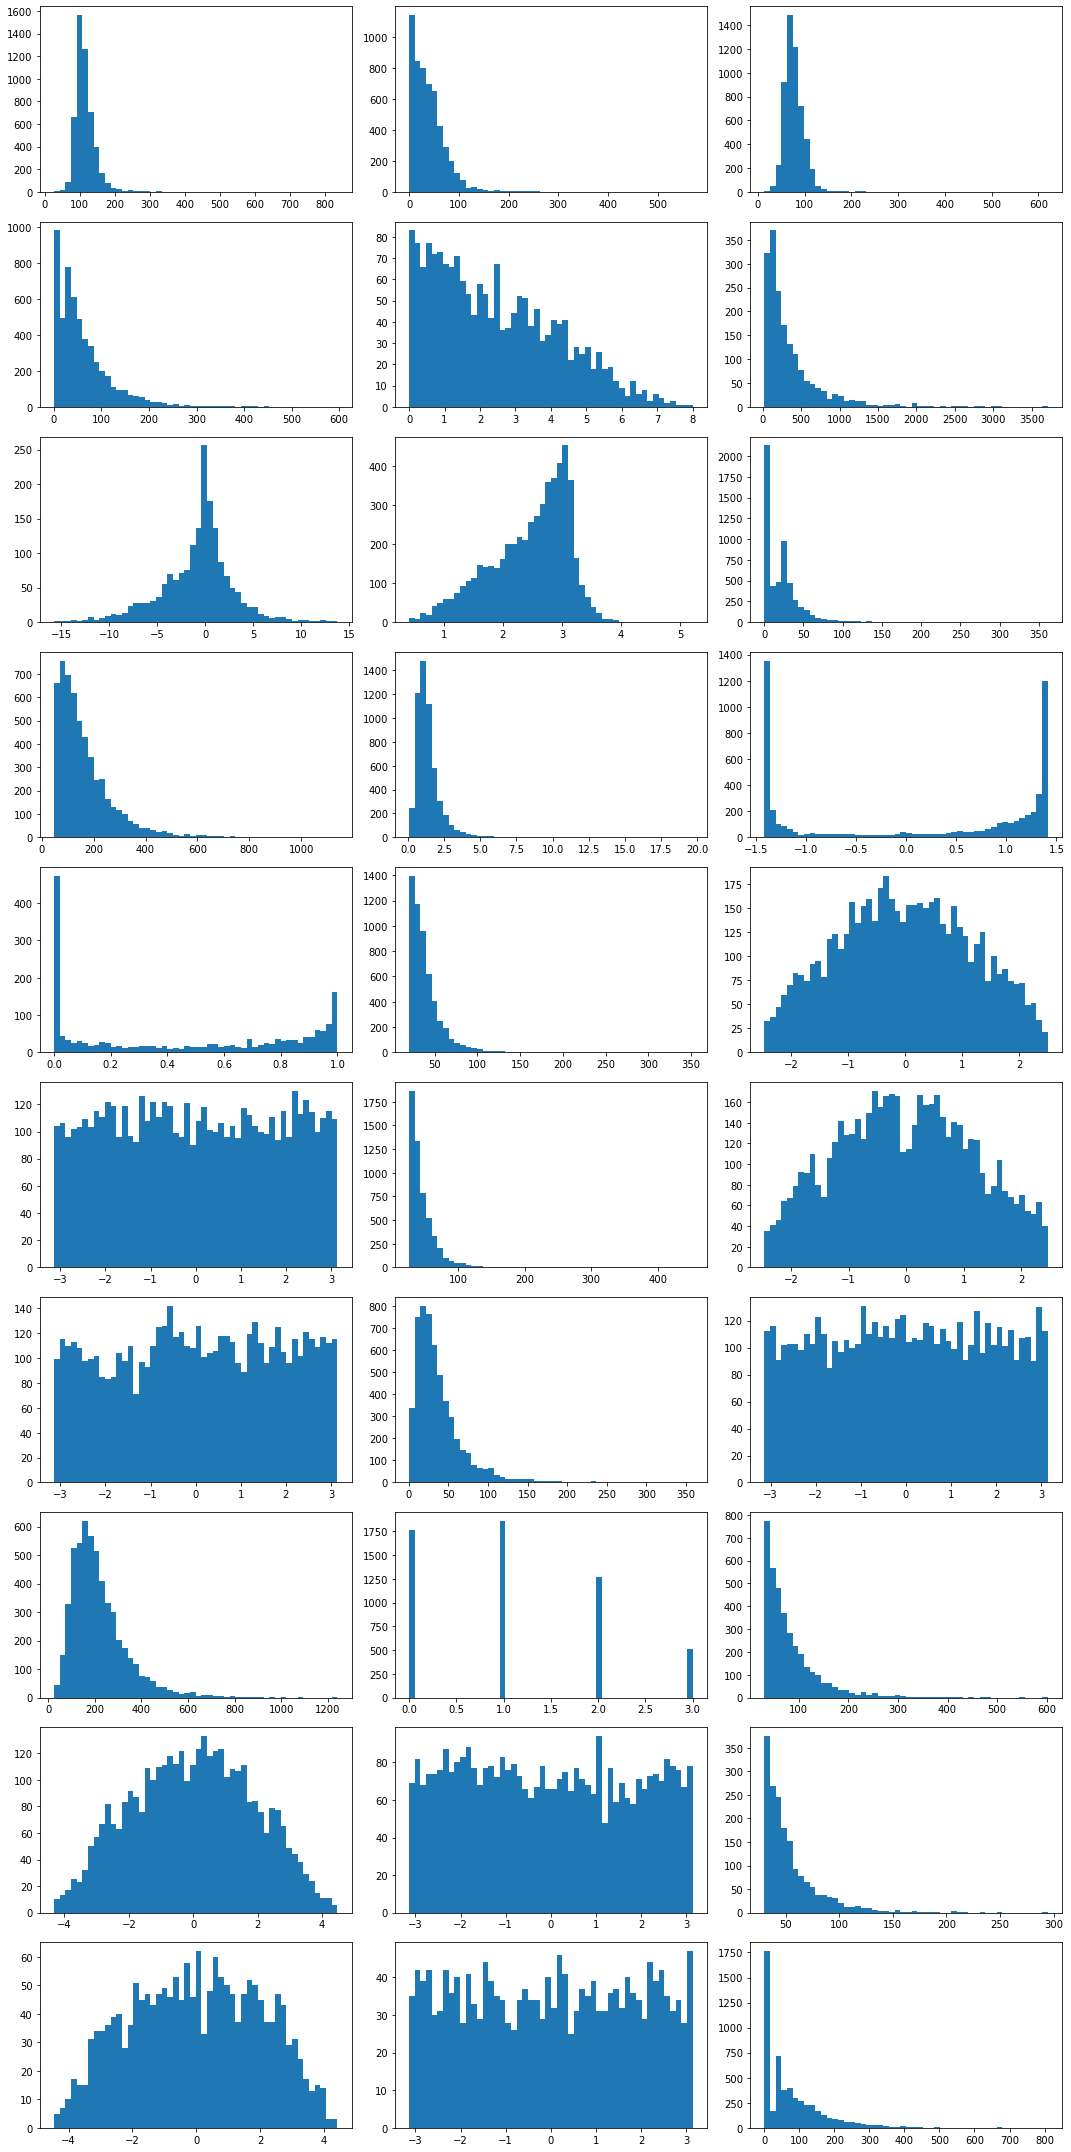

In [145]:
def plot_features_distrib(tX):
    plt.figure(figsize=(15,30))
    for i in range(tX.shape[1]):
        plt.subplot(10,3,i+1)
        plt.hist(tX[:,i], bins=50);
        # plt.title("Feature {}: {}".format(i, labels[i]))
    plt.tight_layout()
    plt.show();
plot_features_distrib(tval_tmp[:, :-2])

In [50]:
tX_test.shape

(568238, 24)

In [51]:
tX_test_poly = build_poly(tX_test, params['degree'], cont_features)

In [52]:
tX_test_poly.shape

(568238, 44)

In [365]:
from datetime import datetime
method = 'reg_logistic_regression_by_jet'
time = datetime.now().strftime('%Y%m%dH%H%M%S')
OUTPUT_PATH = f'../submissions/submission_{method}_{time}'
# y_pred = predict_logistic(weights, tX_test_poly)
# y_pred = replace_values(y_pred, from_val=0, to_val=-1)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)